### Import all Required Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

## Loading Dataset

In [3]:
data = '/content/monet.csv'
file= pd.read_csv(data)
file.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


## Pre-processing Dataset

In [4]:
file.isnull().sum()

PRICE      0
HEIGHT     0
WIDTH      0
SIGNED     0
PICTURE    0
HOUSE      0
dtype: int64

In [ ]:
print(file.shape)

(430, 6)


In [ ]:
print(file.dtypes)

PRICE      float64
HEIGHT     float64
WIDTH      float64
SIGNED       int64
PICTURE      int64
HOUSE        int64
dtype: object


In [ ]:
print(file.describe())

            PRICE      HEIGHT       WIDTH      SIGNED     PICTURE      HOUSE 
count  430.000000  430.000000  430.000000  430.000000  430.000000  430.000000
mean     3.089996   27.646977   32.111395    0.820930  182.644186    1.611628
std      4.311260   10.097013   10.459677    0.383857  109.091529    0.591592
min      0.010413    3.900000    6.700000    0.000000    1.000000    1.000000
25%      0.600153   23.125000   28.525000    1.000000   87.250000    1.000000
50%      1.312782   25.600000   31.900000    1.000000  179.500000    2.000000
75%      3.850000   31.450000   36.200000    1.000000  274.750000    2.000000
max     33.013504   78.700000   89.000000    1.000000  387.000000    3.000000


### Data Visualizations

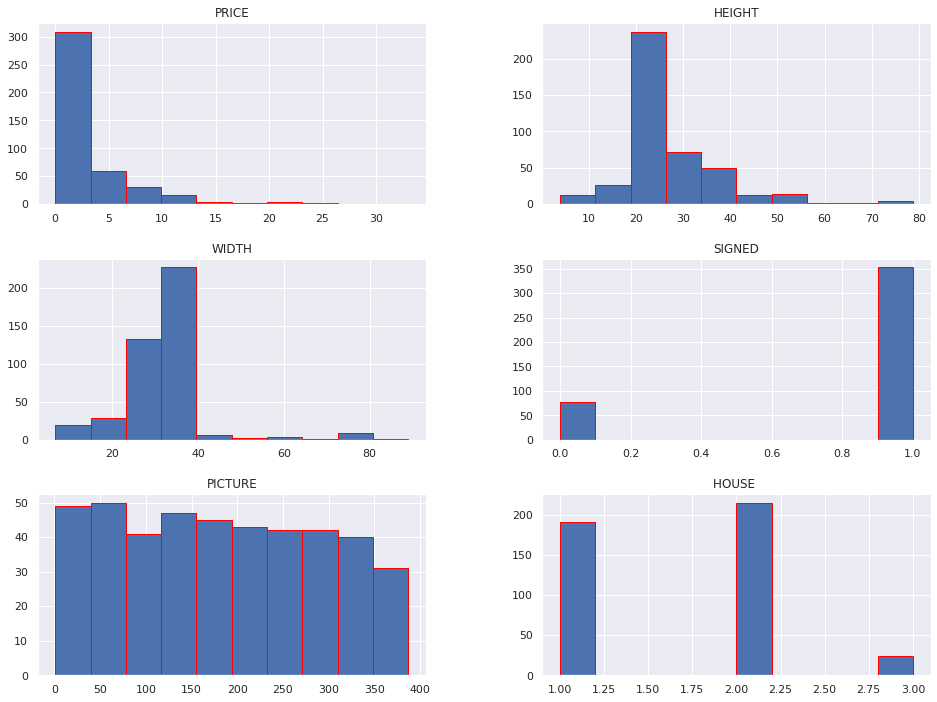

In [18]:
file.hist(edgecolor= 'red',figsize=(16,12))
plt.show()

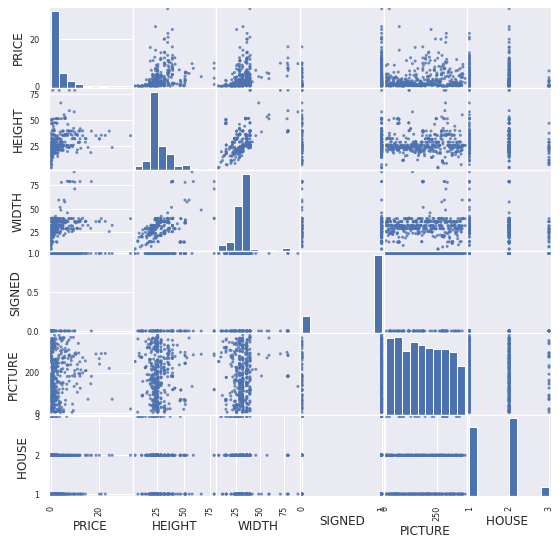

In [ ]:

scatter_matrix (file, alpha=0.8, figsize=(9,9))
plt.show()

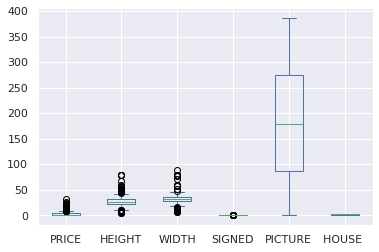

In [9]:
file.plot.box()

In [ ]:
file.corr()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
PRICE,1.000000,0.314581,0.346881,0.136362,0.106078,-0.039878
HEIGHT,0.314581,1.000000,0.503280,-0.145835,0.041556,-0.095278
WIDTH,0.346881,0.503280,1.000000,-0.109218,0.046845,-0.169441
SIGNED,0.136362,-0.145835,-0.109218,1.000000,0.009664,-0.132464
PICTURE,0.106078,0.041556,0.046845,0.009664,1.000000,-0.008359
HOUSE,-0.039878,-0.095278,-0.169441,-0.132464,-0.008359,1.000000


## model 1:
### we will be using Signed as independent variables in this model

In [123]:
#First simple Linear Regression model:
model1= file[['WIDTH','PRICE']]

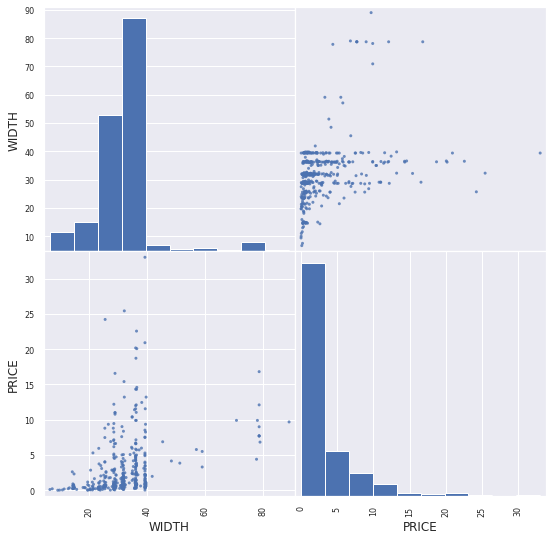

In [124]:
scatter_matrix (model1, alpha=0.8, figsize=(9,9))
plt.show()

Separate the data into NumPy Arrays for input and output

In [125]:
array= model1.values
X = array [:, 0:1]

Y = array [:,1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


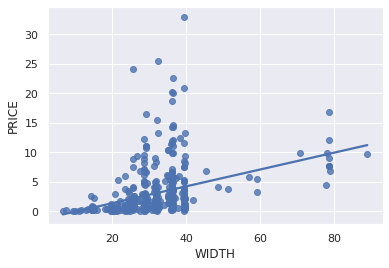

In [86]:
A= file['WIDTH']
B= file['PRICE']
sns.regplot(A,B, ci= None)
plt.show()

Seperating Dataset into Training and Testing Data.
67% for training, and 33% for testing.

In [127]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

In [128]:
md=LinearRegression()

md.fit(X_train, Y_train)
print ("Intercept:", md.intercept_)
print ("Coefficient:", md.coef_)

Intercept: -1.502500330399751
Coefficient: [0.14472303]


### Caluclating R square

better the R square better is the model.

In [129]:
R_squared = md.score(X_test, Y_test)
print("R-squared: ", R_squared)

R-squared:  0.16256378326346277


In [130]:
y_predict = md.predict(X_test)

In [136]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test,y_predict))

2.0617014861666116


In [133]:
from sklearn import metrics
print(metrics.mean_squared_error(Y_test,y_predict))

8.839229472533344


Root Mean Square Eroor

In [138]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(Y_test,y_predict)))

2.973084168423986


###  Predicting dependent variable using an value of independent variable.

In [97]:
md.predict([[42]])

array([4.575867])

### Evaluating The model using K fold, Mean squared error

Fixing a random seed, in order to achieve the same subsets each time the operation is repeated. The original sample is randomly partitioned into k equal-sized subsamples in k-fold cross-validation. A single subsample from the k subsamples is kept as validation data for testing the model, while the remaining k-1 subsamples are used as training data. The crossvalidation procedure is then performed k times, with each of the k subsamples serving as validation data exactly once.After that, the k results can be averaged to get a single estimate. This method has the benefit of repeated random subsampling in that all observations are used for both training and validation, and each observation is used only once for validation

In [156]:
num_folds = 5

seed = 7

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

scoring = 'neg_mean_squared_error'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("Using negative mean squared error:Average of all results from the K-fold Cross Validation",results.mean())

Using negative mean squared error:Average of all results from the K-fold Cross Validation -1.626705198540782e-05


## Creating new variable by modifying existing variables.
i.e. size = height*width

In [44]:
file['size'] = file['HEIGHT']*file['WIDTH']

In [45]:
file

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,size
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40
...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,1008.64
426,9.352500,25.9,39.6,1,375,2,1025.64
427,8.252500,25.6,39.6,1,375,1,1013.76
428,3.410000,25.6,39.4,1,386,2,1008.64


## model 2:
### we will be using Price and size as independent variables in this model

In [141]:
# Second Simple Linear Regression Model:
model2= file[['size','PRICE']]

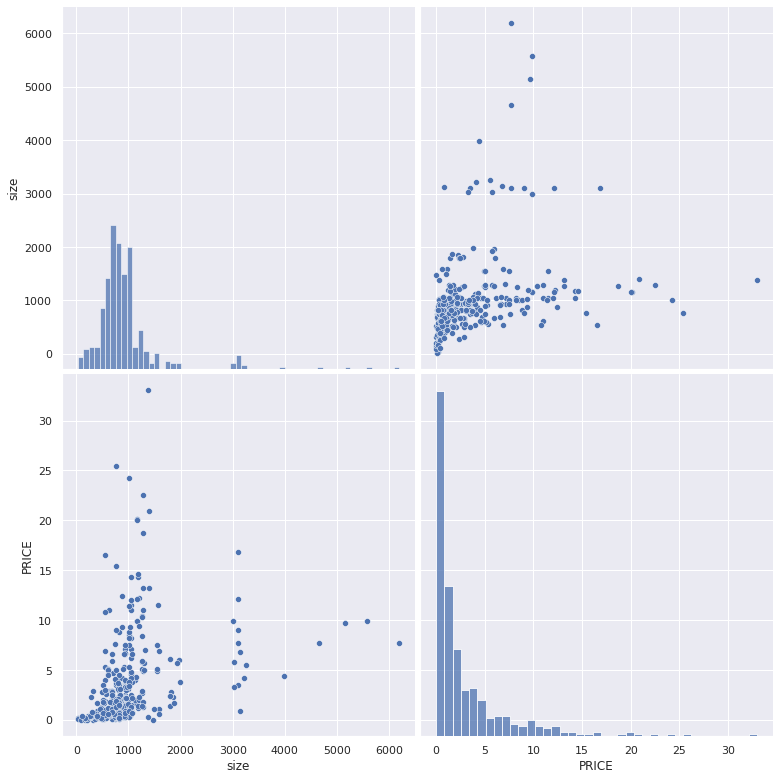

In [47]:
sns.pairplot(model2, height=5.5);
plt.show()

Separate the data into NumPy Arrays for input and output

In [142]:
array= model2.values

X = array [:, 0:1]

Y = array [:,1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


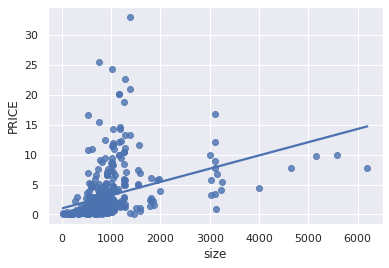

In [101]:
A= file['size']
B= file['PRICE']
sns.regplot(A,B, ci= None)
plt.show()

Seperating Dataset into Training and Testing Data. 67% for training, and 33% for testing.

In [143]:
test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

In [144]:
mx=LinearRegression()

mx.fit(X_train, Y_train)

#printing out the coefficients and the intercept

print ("Intercept:", mx.intercept_)
print ("Coefficients:", mx.coef_)

Intercept: 1.1177077183115656
Coefficients: [0.00213819]


Caluclating R square
better the R square better is the model.

In [145]:
R_squared = mx.score(X_test, Y_test)
print("R-squared: ", R_squared)

R-squared:  0.17896800311935968


In [146]:
y_predict = mx.predict(X_test)

In [147]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(Y_test,y_predict)))

2.943820844576865


Predicting dependent variable using an value of independent variable.


In [104]:
mx.predict([[545]])

array([77.37155199])

Evaluating The model using K fold, Mean squared error

In [105]:
num_folds = 5
seed = 7

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -16.344232289942262


## Multivariate Regression

In [107]:
file


,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,size
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40
...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,1008.64
426,9.352500,25.9,39.6,1,375,2,1025.64
427,8.252500,25.6,39.6,1,375,1,1013.76
428,3.410000,25.6,39.4,1,386,2,1008.64


In [108]:
col_names = ['PRICE','HEIGHT','WIDTH','SIGNED','PICTURE','HOUSE','size']

### Normalizing Dataset

In [109]:
from sklearn import preprocessing
d = preprocessing.normalize(file)
scaled_file = pd.DataFrame(d , columns=col_names  )
scaled_file.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,size
0,0.007310,0.038989,0.046860,0.001830,0.001830,0.001830,0.998108
1,0.010762,0.039011,0.031307,0.001223,0.002446,0.002446,0.998684
2,0.001185,0.062077,0.143048,0.000000,0.026990,0.026990,0.987029
3,0.002474,0.031211,0.038861,0.001214,0.004858,0.002429,0.998739
4,0.001806,0.031211,0.038861,0.001214,0.004858,0.002429,0.998740


### Multi Variate Linear Regression

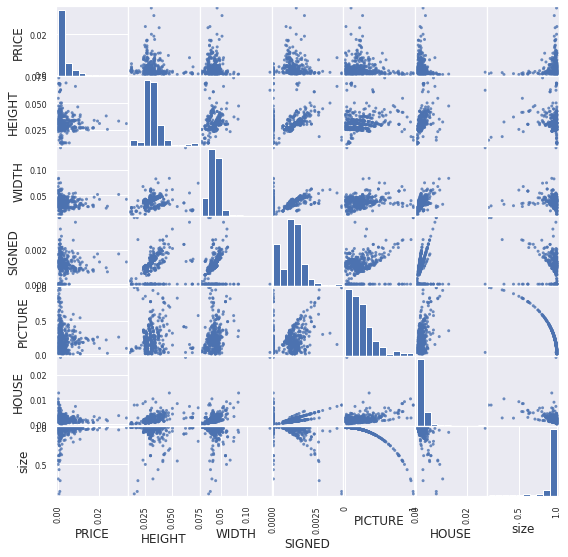

In [110]:
scatter_matrix (scaled_file, alpha=0.8, figsize=(9,9))
plt.show()

In [111]:
scaled_file.corr()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,size
PRICE,1.000000,-0.081058,-0.092017,0.082818,-0.112456,-0.114594,0.137122
HEIGHT,-0.081058,1.000000,0.228042,0.267455,0.111958,0.447168,-0.057337
WIDTH,-0.092017,0.228042,1.000000,0.241974,0.183634,0.646242,-0.112248
SIGNED,0.082818,0.267455,0.241974,1.000000,0.252265,0.140227,-0.252778
PICTURE,-0.112456,0.111958,0.183634,0.252265,1.000000,0.371149,-0.874023
HOUSE,-0.114594,0.447168,0.646242,0.140227,0.371149,1.000000,-0.430755
size,0.137122,-0.057337,-0.112248,-0.252778,-0.874023,-0.430755,1.000000


In [60]:
# Multivariate Regression Model:
#we will be using all independent variables in this model

In [148]:
multivariatemodel= scaled_file[['SIGNED','PICTURE','HOUSE','size','PRICE']]

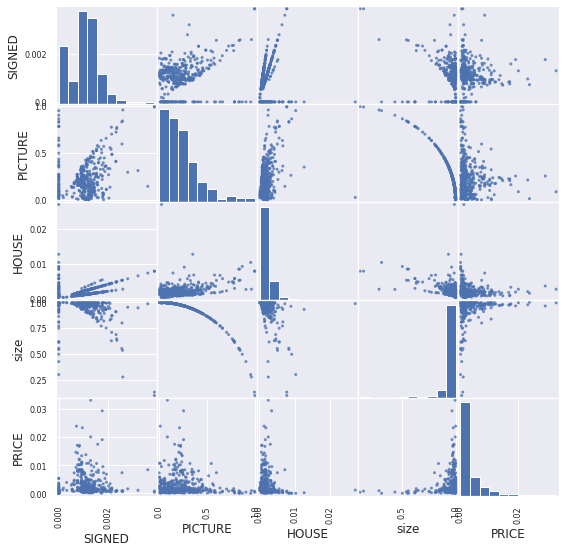

In [149]:
scatter_matrix (multivariatemodel, alpha=0.8, figsize=(9,9))
plt.show()

In [150]:
array= multivariatemodel.values

# I am separating the array into input and output components by slicing 
# I am creating the X variable to only show the rows/columns from zero to three.

X = array [:, 0:4]

# I am creating the Y variable to only show the rows in the last column.

Y = array [:,4]

In [151]:
# I am splittig the dataset. I will use 67% for training, and 33% for testing.

test_size = 0.33

# Selecting random seeds.

seed = 7

# I am splitting the datasets into training datasets

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

In [152]:
# I am building the model then training the model using the training subset

ms=LinearRegression()

ms.fit(X_train, Y_train)

# I am printing out the coefficients and the intercept

print ("Intercept:", ms.intercept_)
print ("Coefficients:", ms.coef_)

Intercept: -0.002261234555943817
Coefficients: [ 8.49788691e-01  1.84462310e-04 -2.53249328e-01  5.24871261e-03]


In [153]:
R_squared = ms.score(X_test, Y_test)
print("R-squared: ", R_squared)

R-squared:  0.0188867603790015


Root Mean Square Error

In [154]:
y_predict = ms.predict(X_test)

In [155]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(Y_test,y_predict)))

0.003735016824319401


Predicting the dependent variable using 
SIGNED=5
PICTURE=8
HOUSE=1
size = 322

In [119]:
ms.predict([[5,8,1,322]])

array([5.68499405])

### model predicts the size of house to be 5.684

In [120]:
# I am evaluating the algorithm and specifing the K-size

num_folds = 5

# I am fixing the random seed as it must use the same seed.

seed = 7

# I am splitting the data set into folds

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# I am using MSE value to evaluate the model/algorithm since this is linear regression

scoring = 'neg_mean_squared_error'

# I am training the model and runing K-foLd cross-validation to evaluate the model

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# I am printing out the evaluation results

print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -1.626705198540782e-05
